**Import the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
path=r"C:\Users\hp\Documents\DATA-SCIENCE\Data files\loan_prediction.csv"
loan_df=pd.read_csv(path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
shape=loan_df.shape    # it gives number of rows and column of the data
shape

(614, 13)

In [4]:
size=loan_df.size      # it gives multiple of rows and column
size

7982

In [5]:
dtypes=loan_df.dtypes    # it gives information about which column are object and which are intiger
dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
index=loan_df.index   # it gives starting index , last index and step 
index

RangeIndex(start=0, stop=614, step=1)

In [7]:
values=loan_df.values  # it gives total values of all the rows and columns
values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [8]:
loan_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
loan_df.drop('Loan_ID',axis=1,inplace=True)

**Seperate categorical and numerical**

In [10]:
# seperate categorical and numerical columns
num=loan_df.select_dtypes(include=['number']).columns
cat=loan_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
num: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [11]:
loan_df.head()  # it gives starting 5 rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loan_df.tail()   # it gives last 5 rows values

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan_df[num]=loan_df[num].fillna(loan_df[num].median())

In [15]:
loan_df[cat]=loan_df[cat].fillna(loan_df[cat].mode().iloc[0])

In [16]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Categorical Analysis**

In [17]:

cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
for i in cat:
    a=loan_df[i].unique()
    print(i,a)

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']



**Bar Graph**

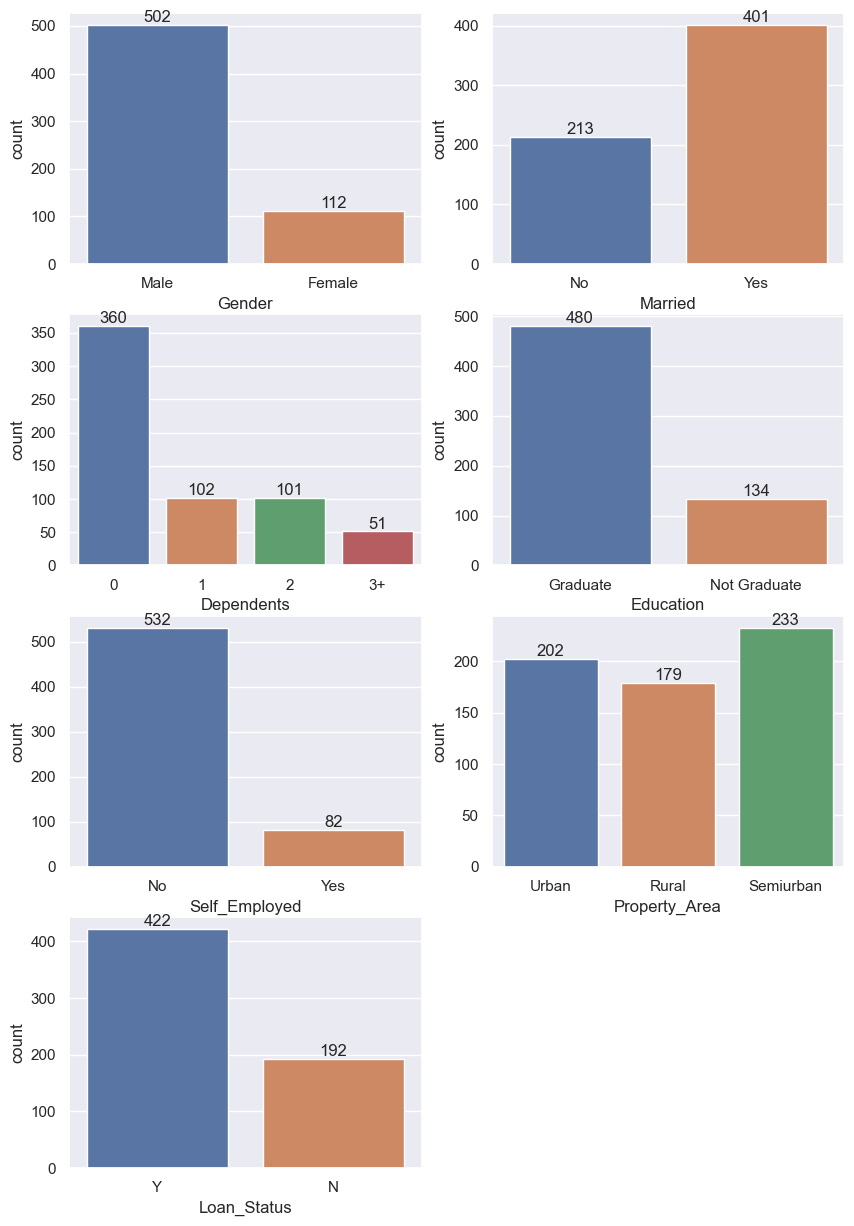

In [19]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=loan_df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

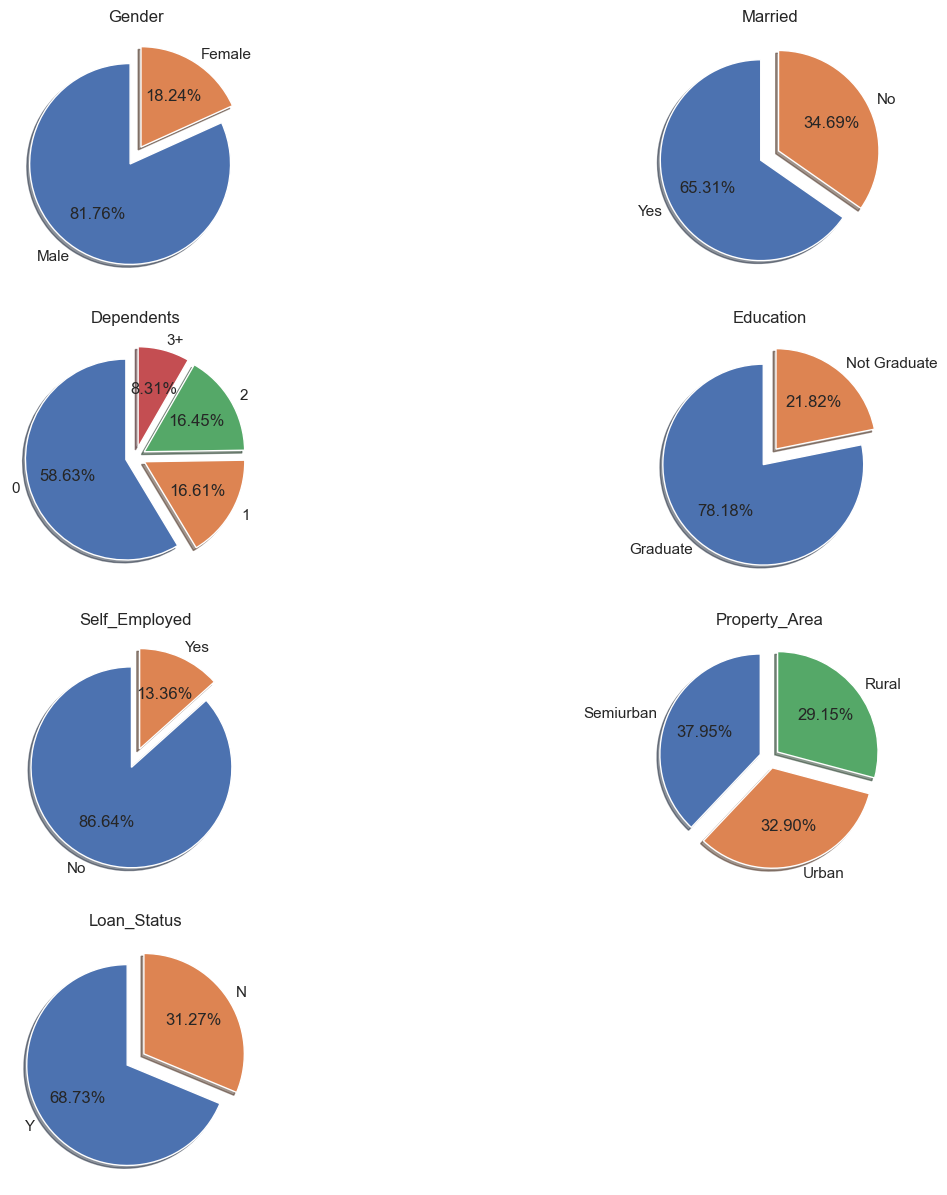

In [20]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    loan_df[column].value_counts()
    Property=loan_df[column].value_counts(normalize=True).keys()
    count=loan_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=loan_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

**Numerical Data Analysis**

In [21]:
for i in num:
    d_count=round(loan_df[i].count(),2)
    d_max=round(loan_df[i].max(),2)
    d_min=round(loan_df[i].min(),2)
    d_mean=round(loan_df[i].mean(),2)
    d_median=round(loan_df[i].median(),2)
    d_std=round(loan_df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

ApplicantIncome count: 614
ApplicantIncome max: 81000
ApplicantIncome min: 150
ApplicantIncome mean: 5403.46
ApplicantIncome median: 3812.5
ApplicantIncome std: 6109.04
------------------------------------
CoapplicantIncome count: 614
CoapplicantIncome max: 41667.0
CoapplicantIncome min: 0.0
CoapplicantIncome mean: 1621.25
CoapplicantIncome median: 1188.5
CoapplicantIncome std: 2926.25
------------------------------------
LoanAmount count: 614
LoanAmount max: 700.0
LoanAmount min: 9.0
LoanAmount mean: 145.75
LoanAmount median: 128.0
LoanAmount std: 84.11
------------------------------------
Loan_Amount_Term count: 614
Loan_Amount_Term max: 480.0
Loan_Amount_Term min: 12.0
Loan_Amount_Term mean: 342.41
Loan_Amount_Term median: 360.0
Loan_Amount_Term std: 64.43
------------------------------------
Credit_History count: 614
Credit_History max: 1.0
Credit_History min: 0.0
Credit_History mean: 0.86
Credit_History median: 1.0
Credit_History std: 0.35
------------------------------------


In [22]:
for i in num:
    q1=np.quantile(loan_df[i],0.25)
    q2=np.quantile(loan_df[i],0.50)
    q3=np.quantile(loan_df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

ApplicantIncome q1: 2877.5
ApplicantIncome q2: 3812.5
ApplicantIncome q3: 3
------------
CoapplicantIncome q1: 0.0
CoapplicantIncome q2: 1188.5
CoapplicantIncome q3: 3
------------
LoanAmount q1: 100.25
LoanAmount q2: 128.0
LoanAmount q3: 3
------------
Loan_Amount_Term q1: 360.0
Loan_Amount_Term q2: 360.0
Loan_Amount_Term q3: 3
------------
Credit_History q1: 1.0
Credit_History q2: 1.0
Credit_History q3: 3
------------


In [23]:

loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Histogram**

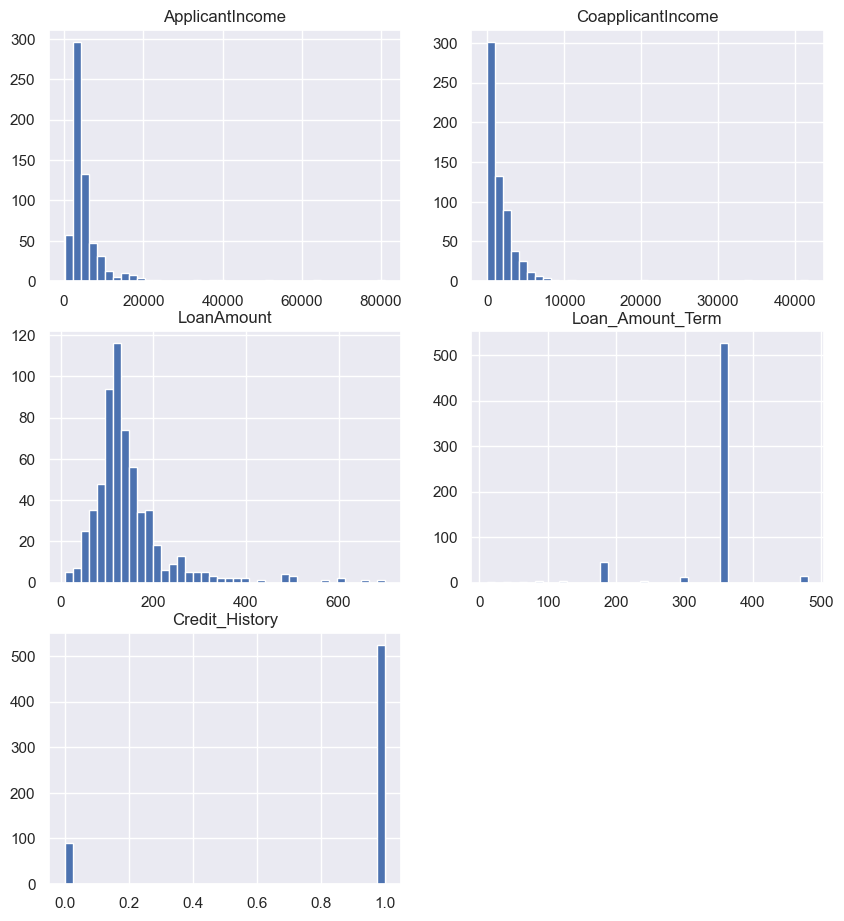

In [24]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(loan_df[column],bins=40)
plt.show()

**Empirical Rule**

In [25]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [26]:
mean=loan_df['ApplicantIncome'].mean()
std=loan_df['ApplicantIncome'].std()

In [27]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['ApplicantIncome']>val_minus_1
con2=loan_df['ApplicantIncome']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['ApplicantIncome']>val_minus_2
con4=loan_df['ApplicantIncome']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['ApplicantIncome']>val_minus_3
con6=loan_df['ApplicantIncome']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9348534201954397
ep2: 0.9739413680781759
ep3: 0.9739413680781759


In [28]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['CoapplicantIncome']>val_minus_1
con2=loan_df['CoapplicantIncome']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['CoapplicantIncome']>val_minus_2
con4=loan_df['CoapplicantIncome']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['CoapplicantIncome']>val_minus_3
con6=loan_df['CoapplicantIncome']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.993485342019544
ep2: 0.993485342019544
ep3: 0.993485342019544


In [29]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['LoanAmount']>val_minus_1
con2=loan_df['LoanAmount']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['LoanAmount']>val_minus_2
con4=loan_df['LoanAmount']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['LoanAmount']>val_minus_3
con6=loan_df['LoanAmount']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [30]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Loan_Amount_Term']>val_minus_1
con2=loan_df['Loan_Amount_Term']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Loan_Amount_Term']>val_minus_2
con4=loan_df['Loan_Amount_Term']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Loan_Amount_Term']>val_minus_3
con6=loan_df['Loan_Amount_Term']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [31]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Credit_History']>val_minus_1
con2=loan_df['Credit_History']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Credit_History']>val_minus_2
con4=loan_df['Credit_History']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Credit_History']>val_minus_3
con6=loan_df['Credit_History']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [32]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

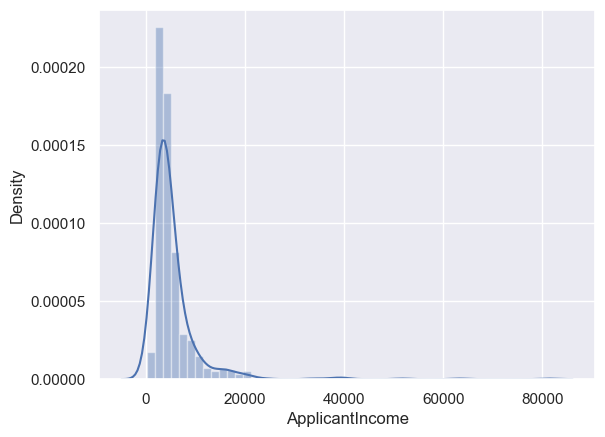

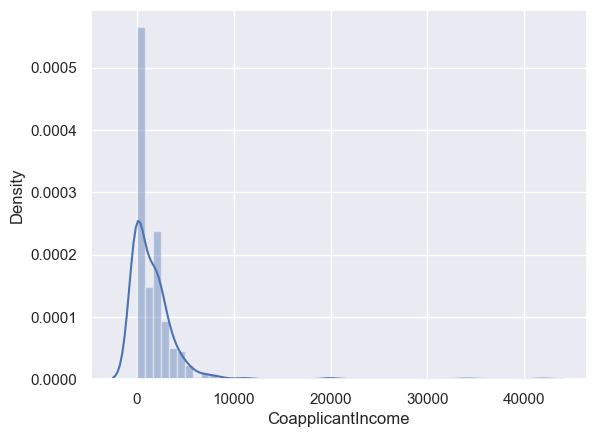

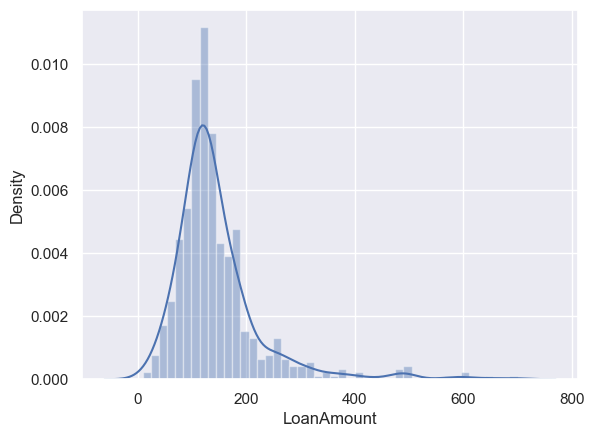

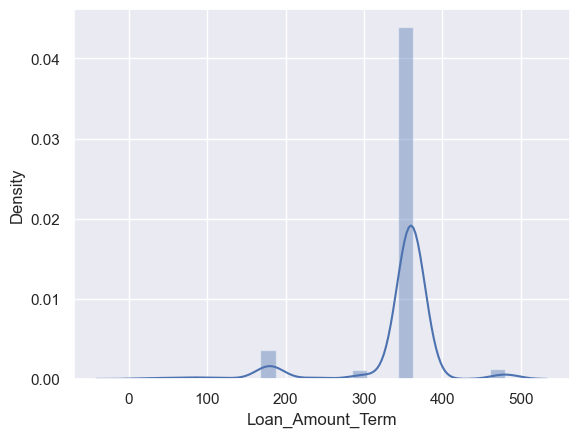

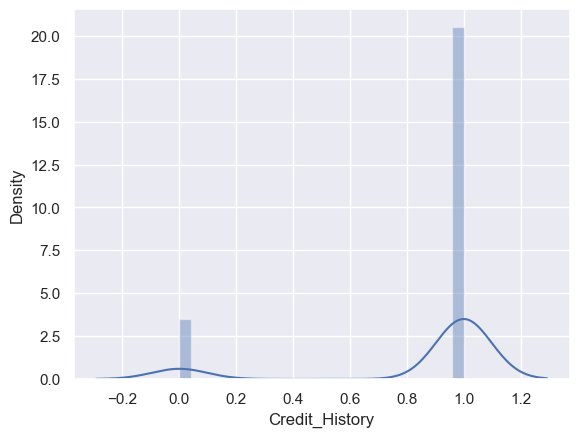

In [33]:

for i in num:
    sns.distplot(loan_df[i])
    plt.show()

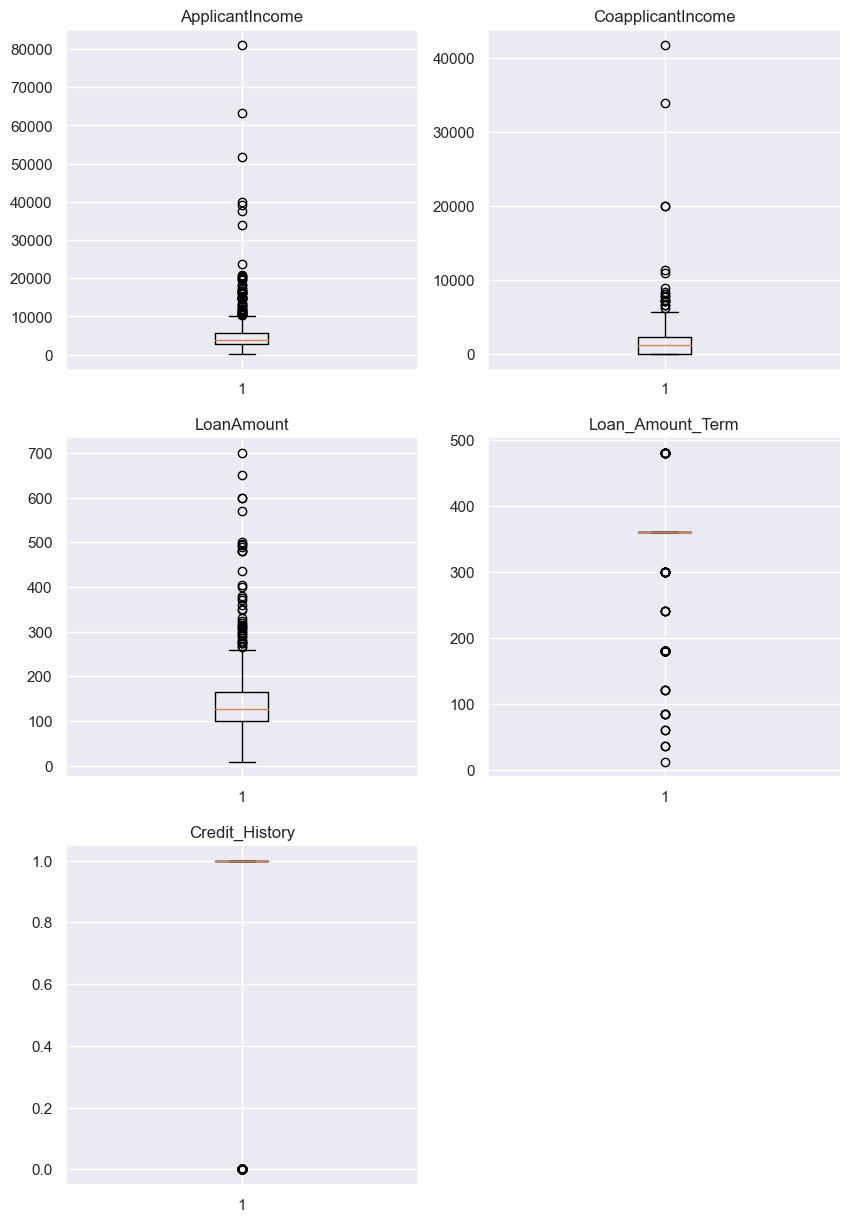

In [34]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

In [35]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']>ub1
con2=loan_df['ApplicantIncome']<lb1
outlier=loan_df[con1|con2]
len(outlier)

50

In [36]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']<ub1
con2=loan_df['ApplicantIncome']>lb1
non_outlier=loan_df[con1&con2]
len(non_outlier)

564

In [37]:
## percentage of outliers

v=(len(outlier)/len(loan_df))*100
v

8.143322475570033

In [38]:
q1=np.quantile(loan_df['CoapplicantIncome'],0.25)
q2=np.quantile(loan_df['CoapplicantIncome'],0.50)
q3=np.quantile(loan_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=loan_df['CoapplicantIncome']<ub2
con2=loan_df['CoapplicantIncome']>lb2
non_outlier2=loan_df[con1&con2]
len(non_outlier2)

596

**LoanAmount**

In [39]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']>ub3
con2=loan_df['LoanAmount']<lb3
outlier3=loan_df[con1|con2]
len(outlier3)

41

In [40]:
v=(len(outlier3)/len(loan_df))*100
v

6.677524429967427

In [41]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']<ub3
con2=loan_df['LoanAmount']>lb3
non_outlier3=loan_df[con1&con2]
len(non_outlier3)

573

In [42]:
loan_df["ApplicantIncome"]=np.clip(loan_df['ApplicantIncome'],lb1,ub1)

In [43]:
len(loan_df['ApplicantIncome'])

614

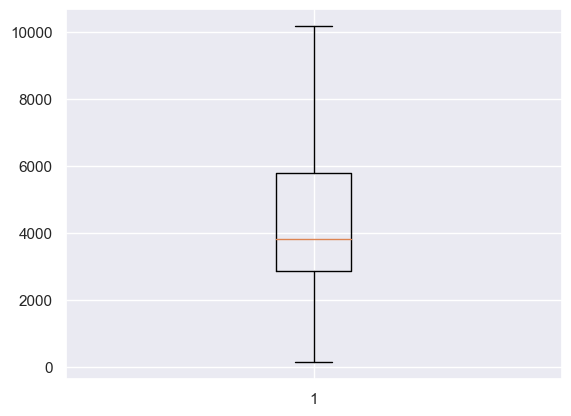

In [44]:
plt.boxplot(loan_df['ApplicantIncome'])
plt.show()

In [45]:
loan_df["CoapplicantIncome"]=np.clip(loan_df['CoapplicantIncome'],lb2,ub2)

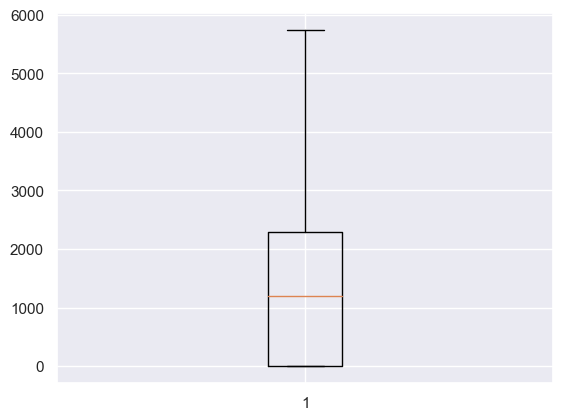

In [46]:
plt.boxplot(loan_df['CoapplicantIncome'])
plt.show()

In [47]:
loan_df["LoanAmount"]=np.clip(loan_df['LoanAmount'],lb3,ub3)

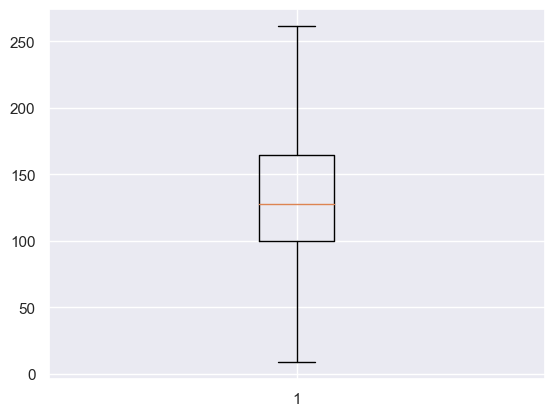

In [48]:
plt.boxplot(loan_df['LoanAmount'])
plt.show()

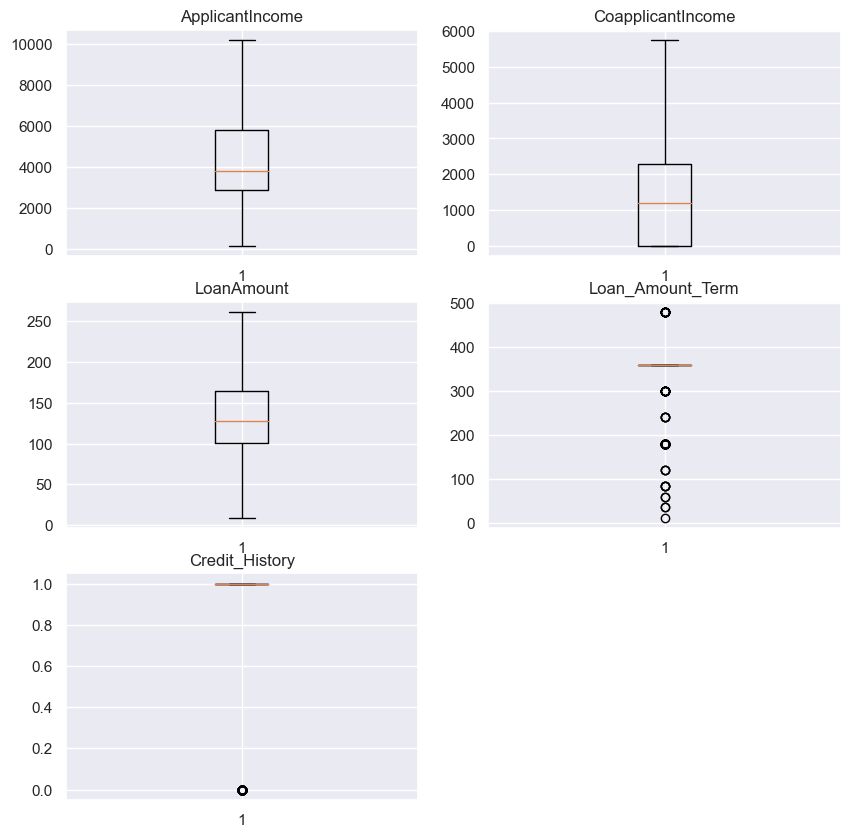

In [49]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

**Bivariate Analysis**

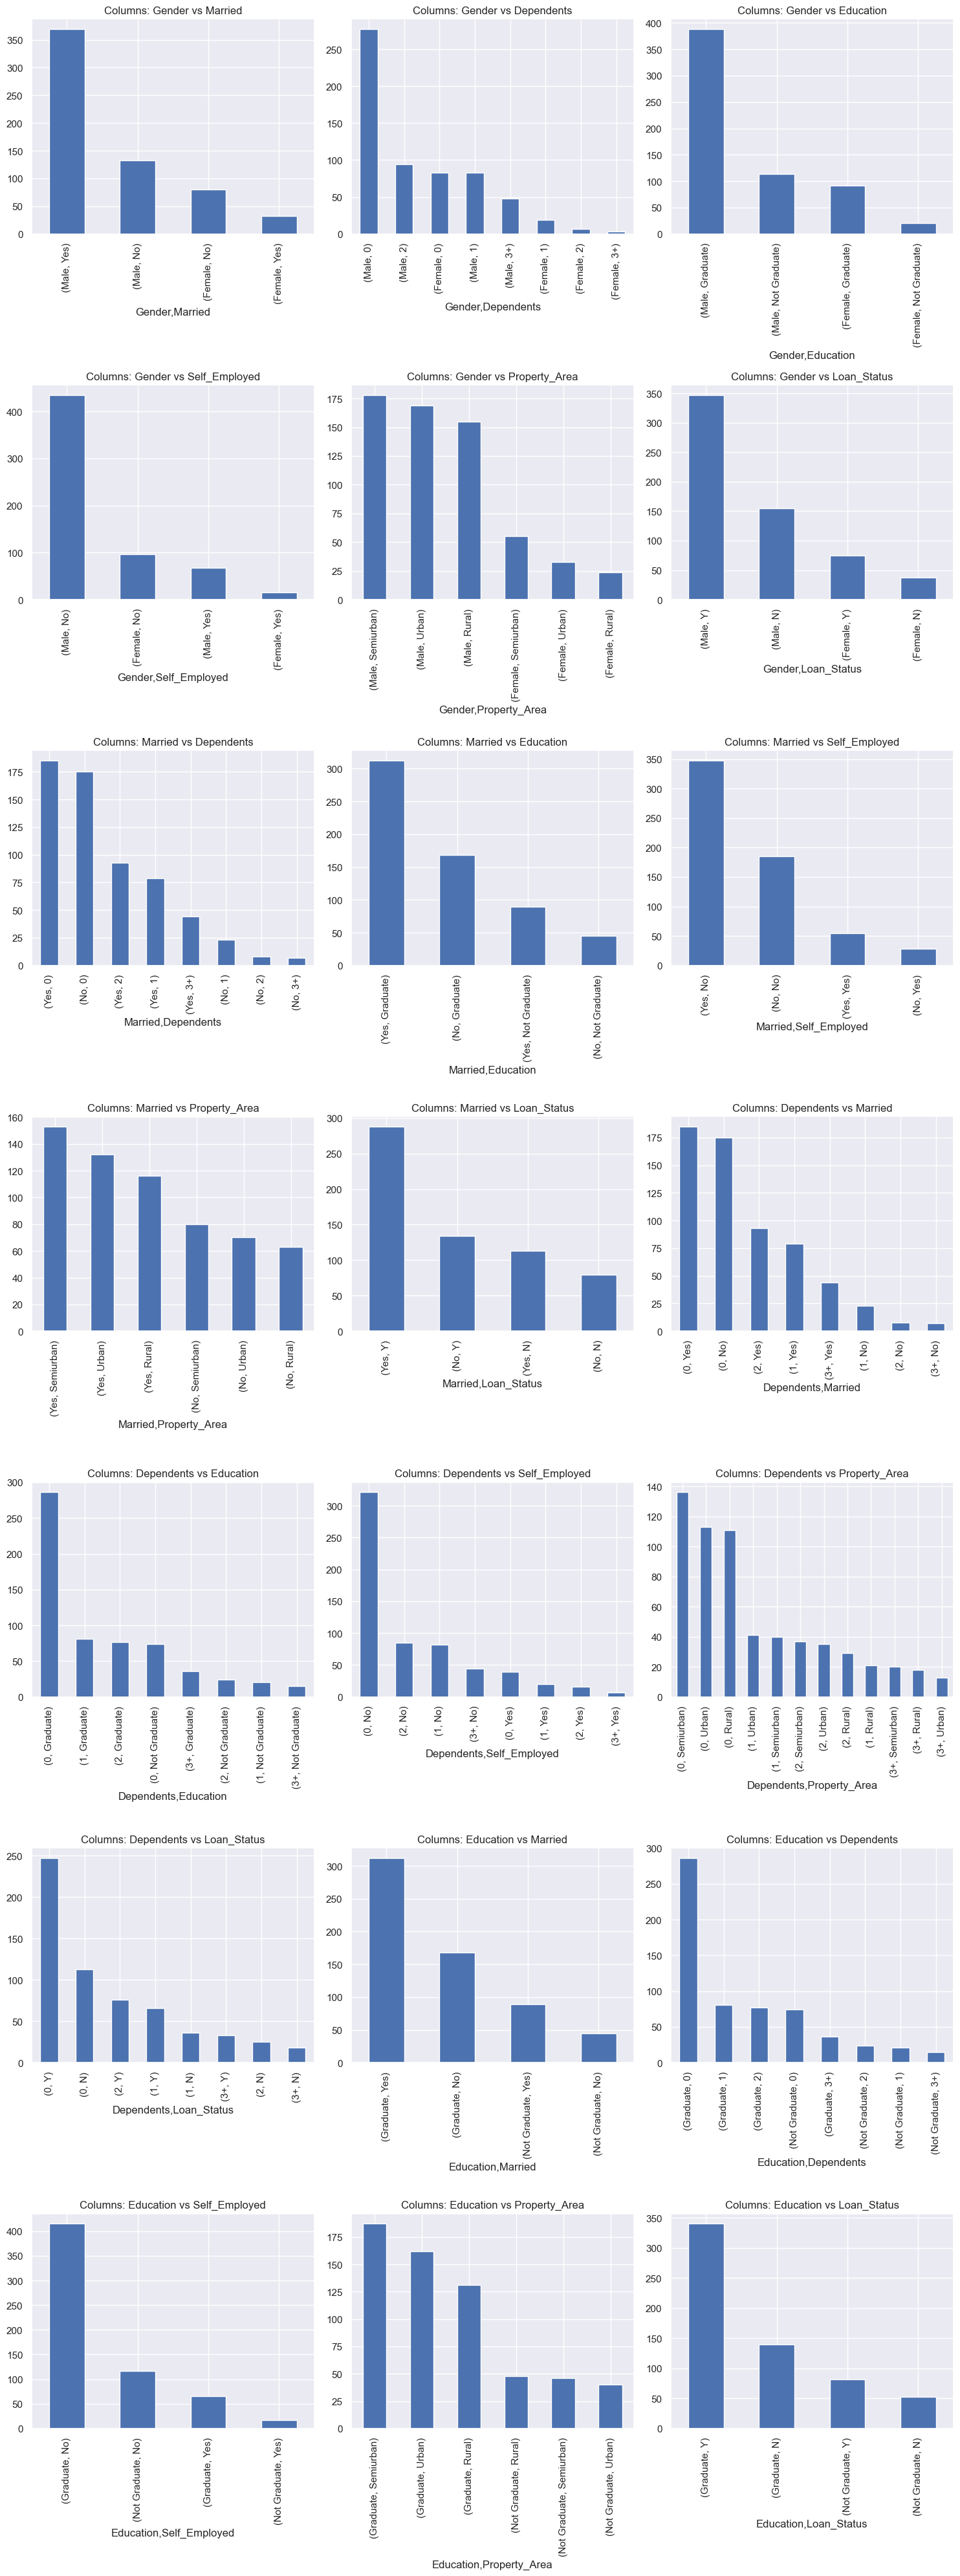

In [50]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7 * 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 40))  # 9 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            loan_df[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**MUltivariate**

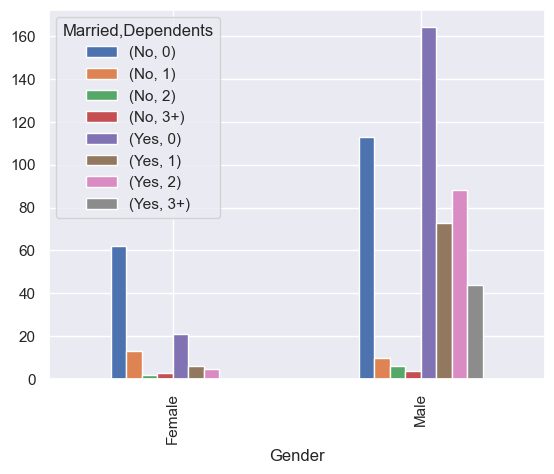

In [51]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Dependents']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

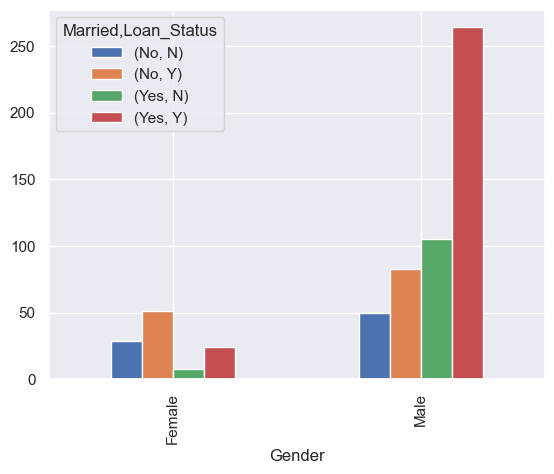

In [52]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Loan_Status']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

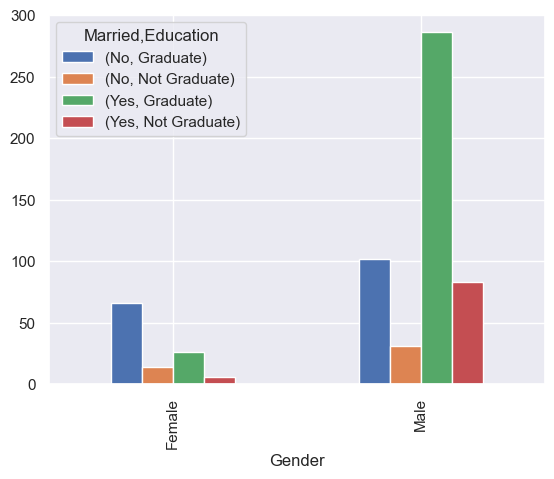

In [53]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Education']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

**NUmerical VS Numerical**

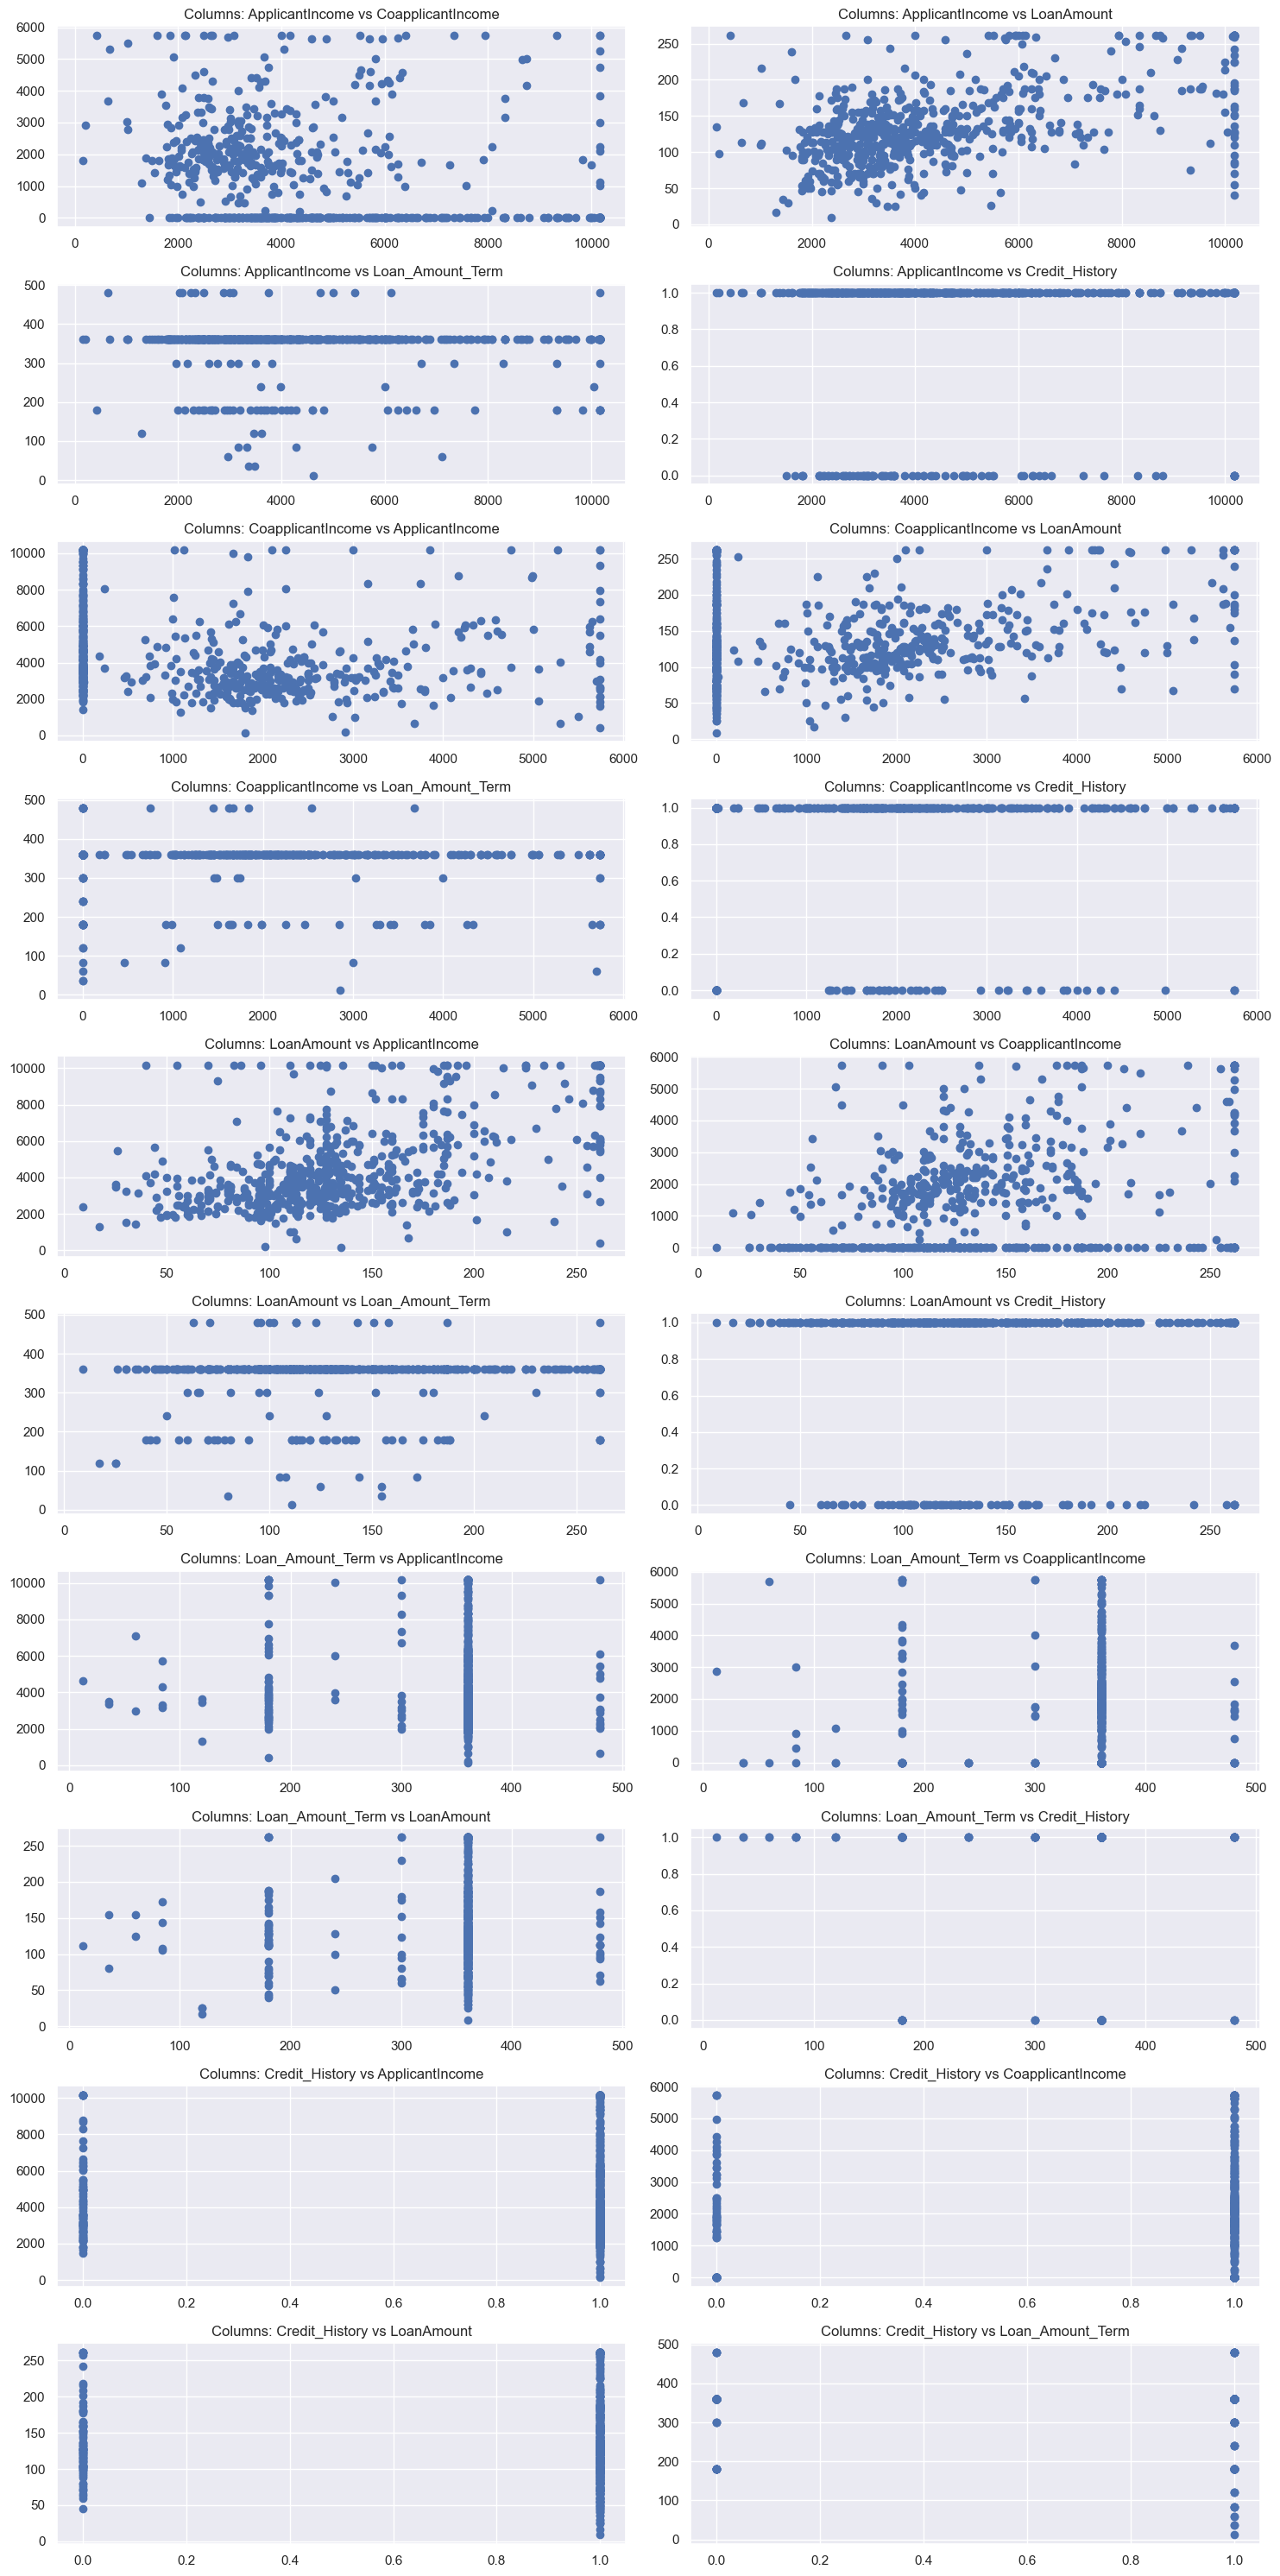

In [54]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(loan_df[i], loan_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Correlation**

In [55]:
corr=loan_df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.228956,0.557953,-0.023926,0.035345
CoapplicantIncome,-0.228956,1.000000,0.265021,-0.029295,-0.001710
LoanAmount,0.557953,0.265021,1.000000,0.063612,0.004320
Loan_Amount_Term,-0.023926,-0.029295,0.063612,1.000000,-0.004705
Credit_History,0.035345,-0.001710,0.004320,-0.004705,1.000000


**HeatMap**

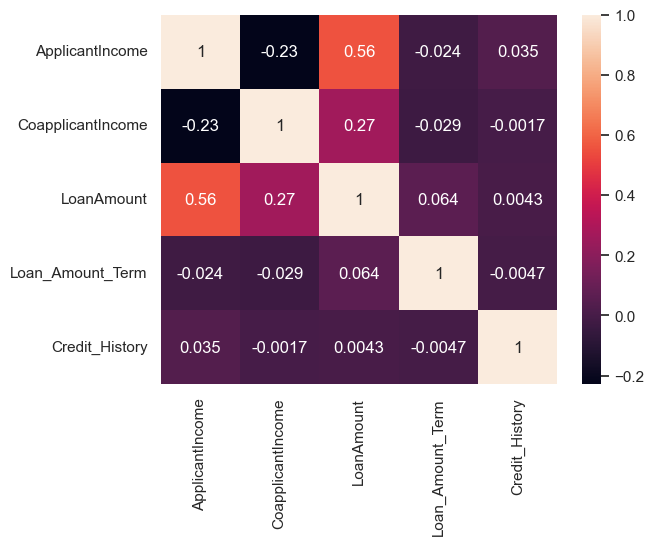

In [56]:
sns.heatmap(corr,annot=True)
plt.show()

**Check the Skew**

In [57]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 0.6836926591947383
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


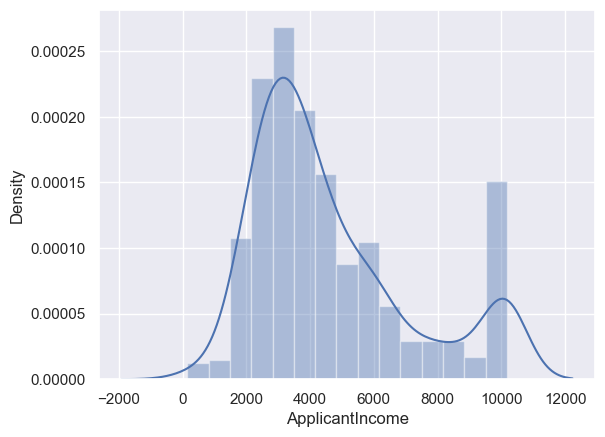

In [58]:
sns.distplot(loan_df['ApplicantIncome'])
plt.show()

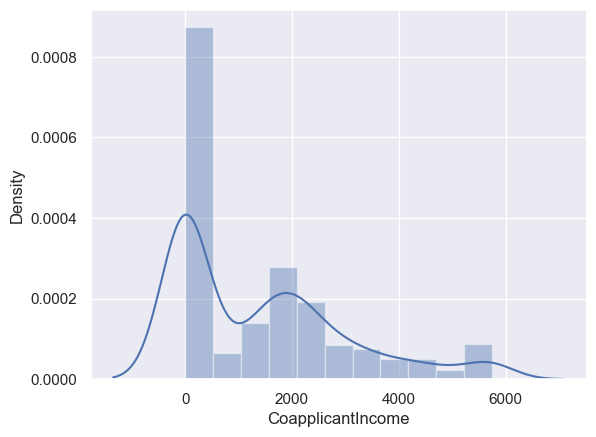

In [59]:
sns.distplot(loan_df['CoapplicantIncome'])
plt.show()

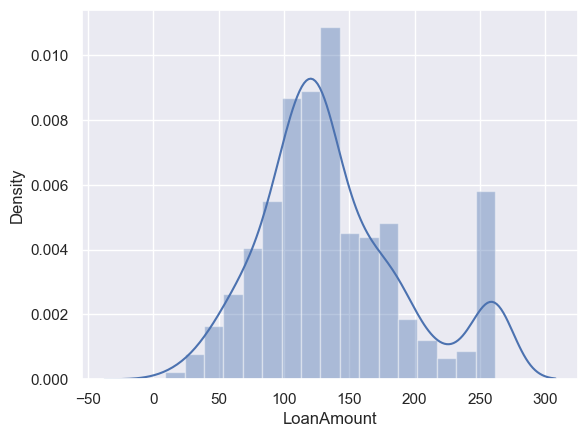

In [60]:
sns.distplot(loan_df['LoanAmount'])
plt.show()

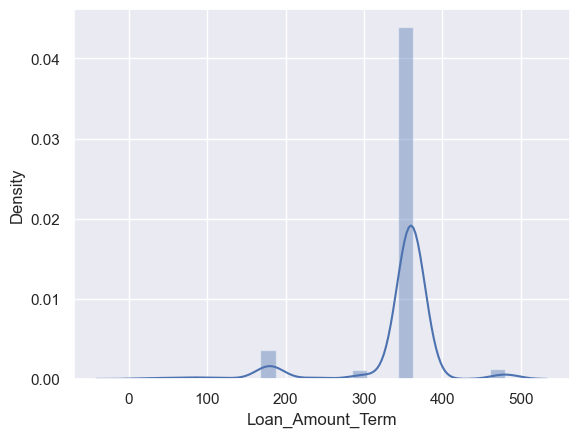

In [61]:
sns.distplot(loan_df['Loan_Amount_Term'])
plt.show()

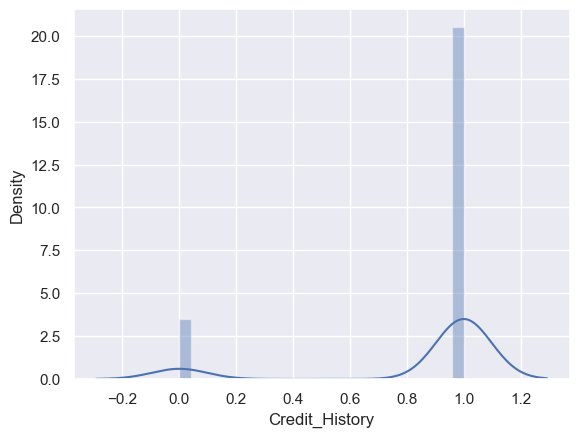

In [62]:
sns.distplot(loan_df['Credit_History'])
plt.show()

In [63]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 0.6836926591947383
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


In [64]:
loan_df['ApplicantIncome'] = np.log1p(loan_df['ApplicantIncome'])

In [65]:
loan_df['LoanAmount']=np.log1p(loan_df['LoanAmount'])

**Apply the label encoder**

**Convert Categorical Into Numerical**

In [66]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    loan_df[i]=le.fit_transform(loan_df[i])

In [67]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.0,4.859812,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,1508.0,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.0,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,2358.0,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.0,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.0,4.276666,360.0,1.0,0,1
610,1,1,3,0,0,8.320448,0.0,3.713572,180.0,1.0,0,1
611,1,1,1,0,0,8.996280,240.0,5.537334,360.0,1.0,2,1
612,1,1,2,0,0,8.933796,0.0,5.236442,360.0,1.0,2,1


 **Perform the feature selection on numerical columns**

**Machine Learning**

In [68]:
X=loan_df.drop('Loan_Status',axis=1)

y=loan_df['Loan_Status']

In [69]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [73]:
print(loan_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 12)
(491, 11)
(123, 11)
(491,)
(123,)


**Logistic Regression**

**Develop the logistic regression with hyper parameter tuning**

In [74]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

LogisticRegression()

**Prediction**

In [75]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [76]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 86.18
F1 is: 0.91
Precision is: 0.83
Recall is: 1.0


**Confusion Metrices**

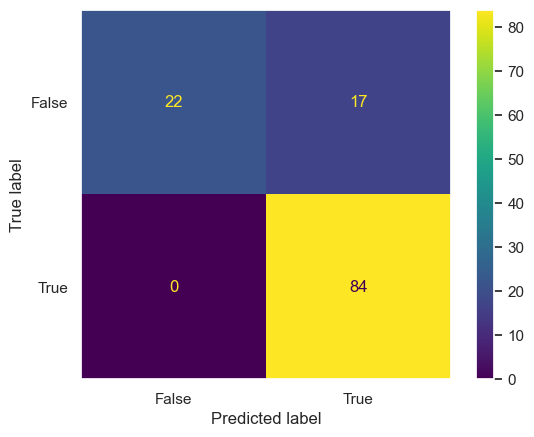

True negative: 22
False postive: 17
False negative: 0
True postive: 84


In [77]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

**ROC AUC Curve**

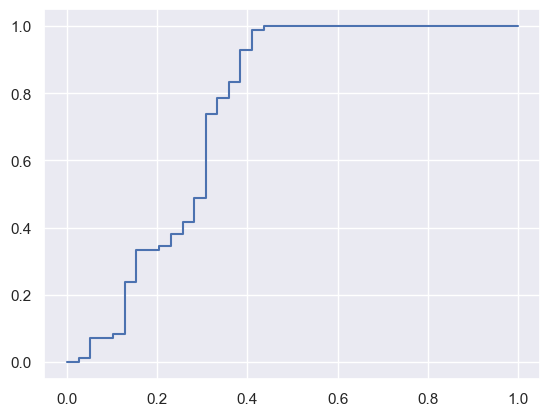

In [249]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [79]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [80]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [81]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [82]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [83]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [84]:
grid_search.best_index_

1

In [85]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [86]:
grid_search.best_score_

0.757713581234173

In [87]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=42)

In [88]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

In [111]:
y_pred_log=log.predict(X_test)


In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 82.11
F1 is: 0.88
Precision is: 0.81
Recall is: 0.96


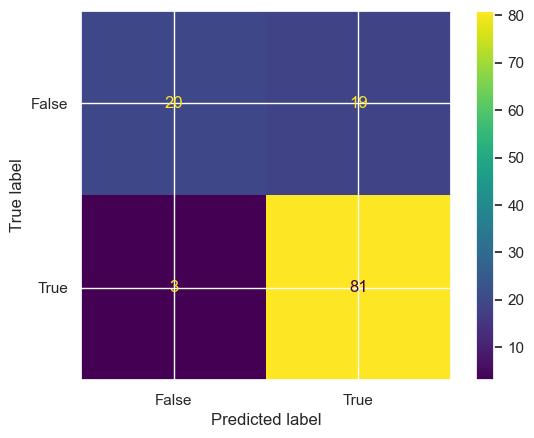

True negative: 20
False postive: 19
False negative: 3
True postive: 81


In [91]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


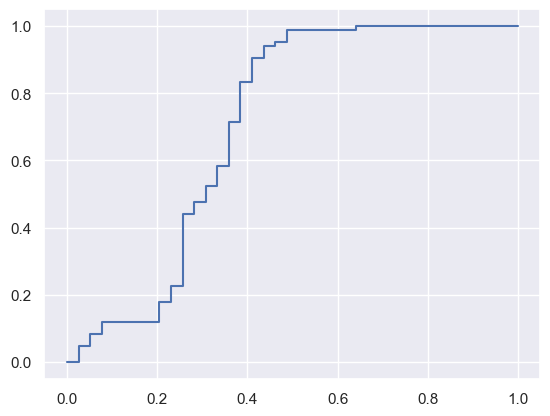

In [92]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [93]:
dict1={'Accuracy':[acc_log],
      "Precision":[precision_log],
      "Recall":[recall_log],
    "F1-score":[f1_log]}

pd.DataFrame(dict1,index=['Logistic Regression '])

,Accuracy,Precision,Recall,F1-score
Logistic Regression,82.11,0.81,0.96,0.88


In [94]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
path=r"C:\Users\hp\Documents\DATA-SCIENCE\Data files\loan_prediction.csv"
test_df=pd.read_csv(path)
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [96]:
test_df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
test_df[num]=test_df[num].fillna(test_df[num].median())

In [98]:
test_df[cat]=test_df[cat].fillna(test_df[cat].mode().iloc[0])

In [99]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
cat1_df = test_df['Loan_ID']
cat1_df


0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [102]:
test_df.drop('Loan_ID',axis=1,inplace=True)

In [105]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    test_df[i]=le.fit_transform(test_df[i])

In [106]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [109]:
cat1_df

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [180]:
y_pred_log

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,0


In [191]:
y_pred_log = pd.DataFrame(y_pred_log,columns=['Loan_Status'])
y_pred_log

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,0


In [192]:
a = pd.concat([cat1_df,pred_df],axis = 1)

In [183]:
a.shape

(614, 2)

In [194]:
a.dropna(inplace=True)     # Drop the null
a.reset_index(drop=True,inplace=True)
a.head()

,Loan_ID,Loan_Status
0,LP001002,1.0
1,LP001003,1.0
2,LP001005,1.0
3,LP001006,1.0
4,LP001008,1.0


In [195]:
a['Loan_Status']=a['Loan_Status'].astype('int')
a

,Loan_ID,Loan_Status
0,LP001002,1
1,LP001003,1
2,LP001005,1
3,LP001006,1
4,LP001008,1
...,...,...
118,LP001421,1
119,LP001422,1
120,LP001426,1
121,LP001430,0


In [196]:
import pandas as pd


# Reset the index and drop the original index column
#a = a.reset_index(drop=True)
a = a.set_index('Loan_ID')
a

,Loan_Status
Loan_ID,
LP001002,1
LP001003,1
LP001005,1
LP001006,1
LP001008,1
...,...
LP001421,1
LP001422,1
LP001426,1


In [190]:
def gaddi(i):
    return 'Y' if i == 1 else 'N'

In [197]:
a['Loan_Status'] = a['Loan_Status'].apply(gaddi)
a

,Loan_Status
Loan_ID,
LP001002,Y
LP001003,Y
LP001005,Y
LP001006,Y
LP001008,Y
...,...
LP001421,Y
LP001422,Y
LP001426,Y
